In [12]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import time

from unet import Unet
from utils.batch_generator import BatchGenerator
%matplotlib inline

In [11]:
DATA_DIR = 'data/train/'
BATCH_SIZE = 1
MINUTE = 60
HOUR = 60 * MINUTE

In [3]:
batch_gen = BatchGenerator(data_dir=DATA_DIR, batch_size=BATCH_SIZE)
batch_gen.load_data()

In [4]:
x, y = next(batch_gen.train_batches)
y = (y + 1) * 127.5

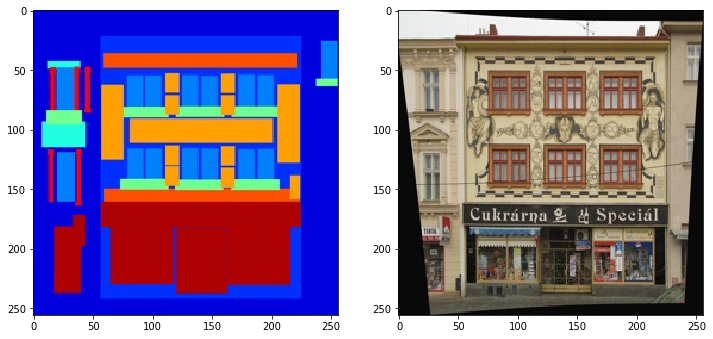

In [5]:
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.imshow(x[0].astype(np.uint8))
plt.subplot(1, 2, 2)
plt.imshow(y[0].astype(np.uint8))

In [6]:
images = tf.placeholder(dtype=tf.float32, shape=[None, 256, 256, 3])
targets = tf.placeholder(dtype=tf.float32, shape=[None, 256, 256, 3])

In [7]:
model = Unet.model(images, targets)

In [8]:
init_vars = tf.global_variables_initializer()

In [13]:
saver = tf.train.Saver()

In [18]:
with tf.Session() as sess:
    sess.run(init_vars)
    fetches = {
        "train": model.train,
        "discrim_loss": model.discrim_loss,
        "gen_loss_GAN": model.gen_loss_GAN,
        "gen_loss_L1": model.gen_loss_L1
    }
    
    start = time.time()
    saver_timer = time.time()
    printer_timer = time.time()
    
    while (time.time() - start) < 40:#10 * HOUR:
        x, y = next(batch_gen.train_batches)
        if x is None or y is None:
            print('skipped')
            continue
        results = sess.run(
            fetches, feed_dict = {
                images: x,
                targets: y
            }
        )
        
        # print results avery 10 min
        if  time.time() - printer_timer > 10 * MINUTE:
            printer_timer = time.time()
            
            print('Results after: {} min'.format((time.time() - start)//60))
            print("discrim_loss", results["discrim_loss"])
            print("gen_loss_GAN", results["gen_loss_GAN"])
            print("gen_loss_L1", results["gen_loss_L1"])
            
        # save a model every hour
        if time.time() - saver_timer > HOUR:
            saver_timer = time.time()
            
            file_name = "./model_time_{}_hours".format((time.time() - start)//HOUR)
            save_path = saver.save(sess, save_path=file_name)
            print('Model saved.')

Results after: 0.0 min
discrim_loss 0.0817126
gen_loss_GAN 0.0393115
gen_loss_L1 0.0316466
Results after: 0.0 min
discrim_loss 0.164345
gen_loss_GAN 0.0817494
gen_loss_L1 0.05885
Model saved.
Results after: 0.0 min
discrim_loss 0.179181
gen_loss_GAN 0.0888455
gen_loss_L1 0.0647798
Model saved.
